In [2]:
import sys
import warnings

import torch

sys.path.append('../')
from datasets.dist import GMM, Gaussian
from model.flow import FlowWrapper
from utils.parsing import parse_args
from datasets.verlet import VerletData

# Suppress specific UserWarnings globally
warnings.filterwarnings("ignore", category=UserWarning)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# Initialize default Verlet Flow
flow_wrapper = FlowWrapper.load_saved('../workdir/c0_trimodal_best/best_model.pt')
flow_wrapper.eval()

KeyError: 'args'

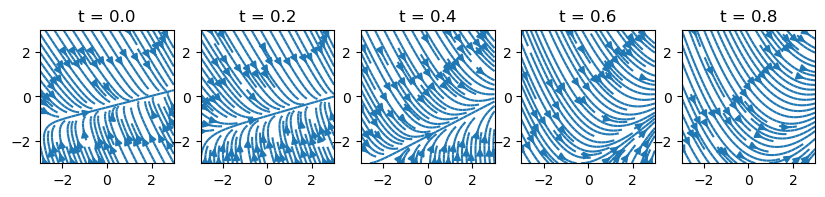

In [3]:
flow_wrapper.graph_flow_marginals()

In [6]:
print(f'Reverse KL loss: {flow_wrapper.reverse_kl_loss(100000, 10)}')
samples, _ = flow_wrapper.sample(10,10)
print(f'Target density of samples: {flow_wrapper._target.q_density.get_density(samples.q)}')

Reverse KL loss: 0.026659181341528893
Target density of samples: tensor([-1.5759, -2.2674, -1.8921, -1.8524, -1.9487, -2.5925, -2.2004, -1.6393,
        -2.2288, -2.5725], device='cuda:0', grad_fn=<LogsumexpBackward0>)


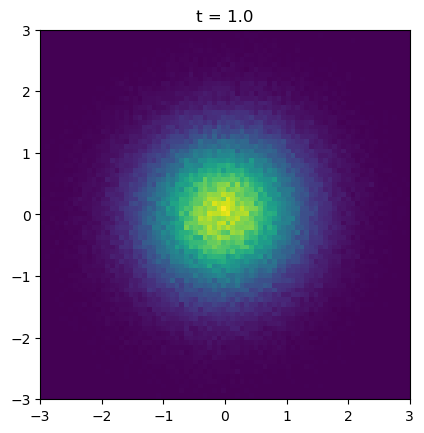

In [5]:
flow_wrapper.graph_end_marginals(300000, 15, xlim=3.0, ylim=3.0)

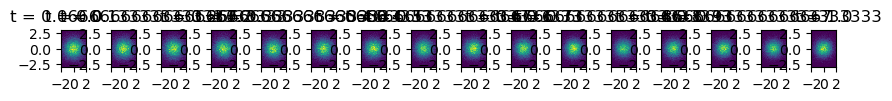

In [6]:
flow_wrapper.graph_time_marginals(100000, 15, ylim=3.0, xlim = 2.0)
